In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

# Reading data

In [ ]:
dstrain=pd.read_excel("Data_Train (1).xlsx")
dstest=pd.read_excel("Data_Test (1).xlsx")

In [ ]:
dstrain.describe()


,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


# Data Visualization

In [ ]:
dstrain.Name.value_counts() #here Price depends on the brand and model of the car so lets split the Name column

Mahindra XUV500 W8 2WD             49
Maruti Swift VDI                   45
Maruti Swift Dzire VDI             34
Honda City 1.5 S MT                34
Maruti Swift VDI BSIV              31
                                   ..
BMW 3 Series Sport                  1
Tata New Safari EX 4x2              1
Volkswagen Beetle 2.0               1
Jaguar XJ 3.0L Portfolio LWB        1
BMW 3 Series 330 Ci Convertible     1
Name: Name, Length: 1876, dtype: int64

In [ ]:
#extracting brand name and model
brand=[i.split()[0].lower().replace("-","") for i in dstrain["Name"]]
model=[i.split()[1].lower() for i in dstrain["Name"]]
dstrain["Brands"]=brand
dstrain["Model"]=model
brand=[i.split()[0].lower().replace("-","") for i in dstest["Name"]]
model=[i.split()[1].lower() for i in dstest["Name"]]
dstest["Brands"]=brand
dstest["Model"]=model

In [ ]:
dstrain.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brands,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,audi,a4


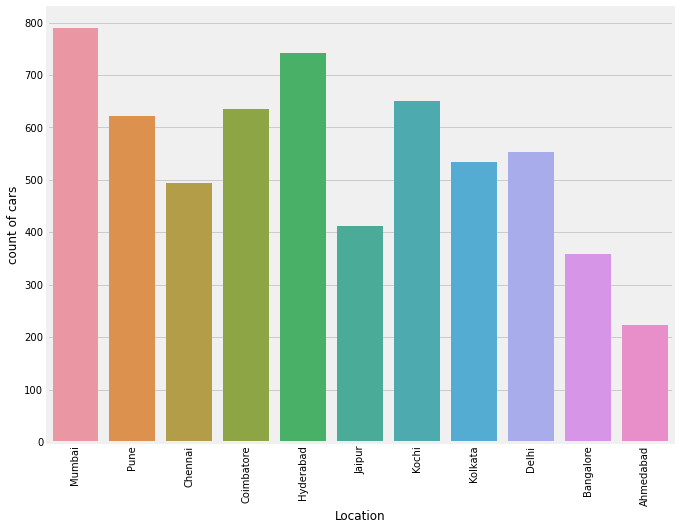

In [ ]:
#now lets see the location vs no of cars being sold
plt.figure(figsize=(10,8))
sns.countplot(x="Location",data=dstrain)
plt.xticks(rotation=90)
plt.ylabel("count of cars")
plt.show()

#here it seems mumbai has the huge sales but it also depends on the population and which year the car had been in sale

let's find out which year cars has the high sales

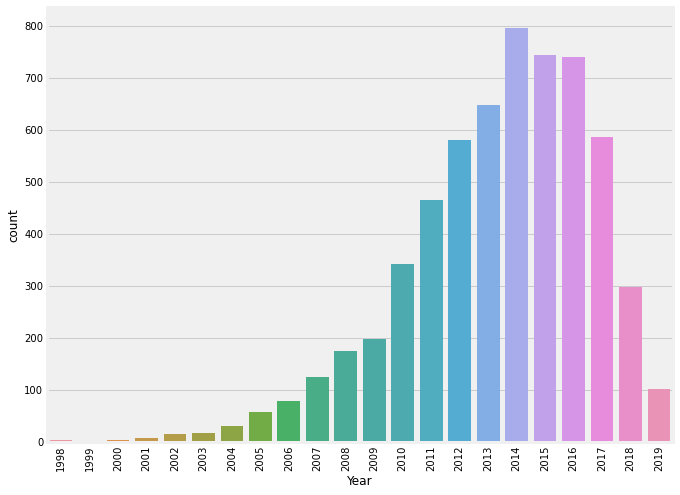

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Year",data=dstrain)
plt.xticks(rotation=90)
plt.show()

let's see what brands are highly sold

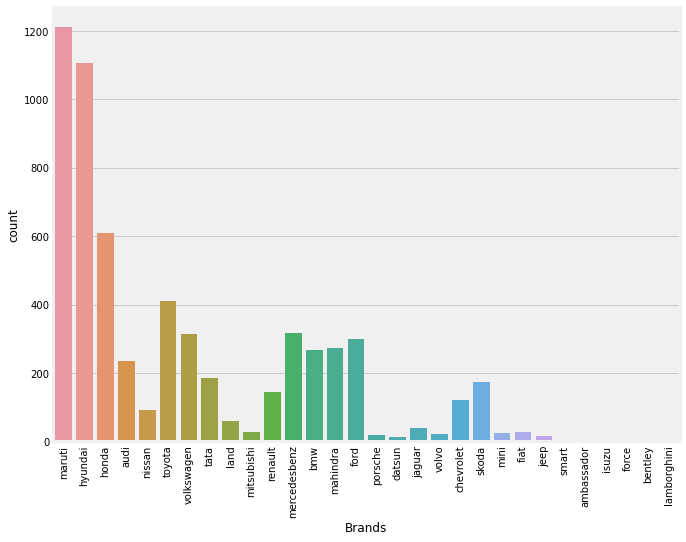

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Brands",data=dstrain)
plt.xticks(rotation=90)
plt.show()

let's see the fuel types of the cars

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

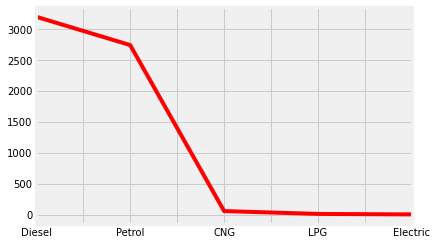

In [ ]:
dstrain.Fuel_Type.value_counts().plot(kind="line",color="red")
dstrain.Fuel_Type.value_counts()

let's see the owner_type of the cars 

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

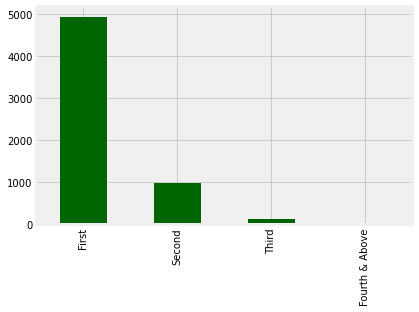

In [ ]:
dstrain.Owner_Type.value_counts().plot(kind="bar",color="darkgreen")
dstrain.Owner_Type.value_counts()

here is the Transmission mode of the cars

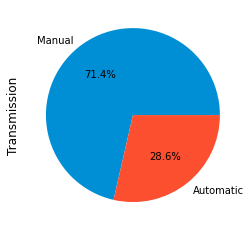

In [ ]:
dstrain.Transmission.value_counts().plot(kind="pie",autopct='%1.1f%%')

#let's find out the kilometer driven cars and their sales

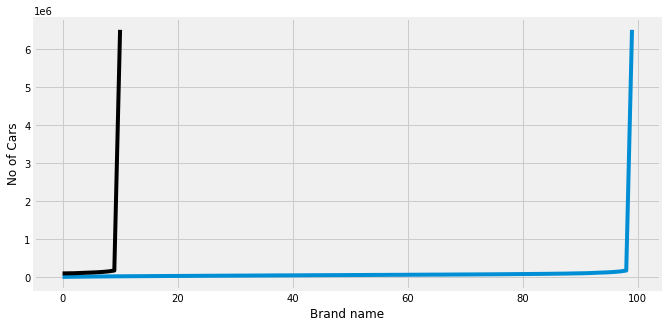

,Kilometers_Driven,Brands
340,775000,skoda
358,620000,hyundai
1860,720000,volkswagen
2328,6500000,bmw


In [ ]:
plt.figure(figsize=(10,5))
kmd=[np.percentile(dstrain.Kilometers_Driven,i) for i in range(1,101,1)]
kmdp=[np.percentile(dstrain.Kilometers_Driven,i) for i in range(90,101,1)]
plt.plot(kmd)
plt.plot(kmdp,color="black")
plt.ylabel("No of Cars")
plt.xlabel("Brand name")
plt.show()
dstrain[dstrain["Kilometers_Driven"]>600000].iloc[:,[3,-2]]

Seems that kilometers driven less than 600000 are mostly selling 

#let's see the influence of brand and owner type on the price

Text(0.5, 1.0, 'Price vs Brand with influence of Owner_type')

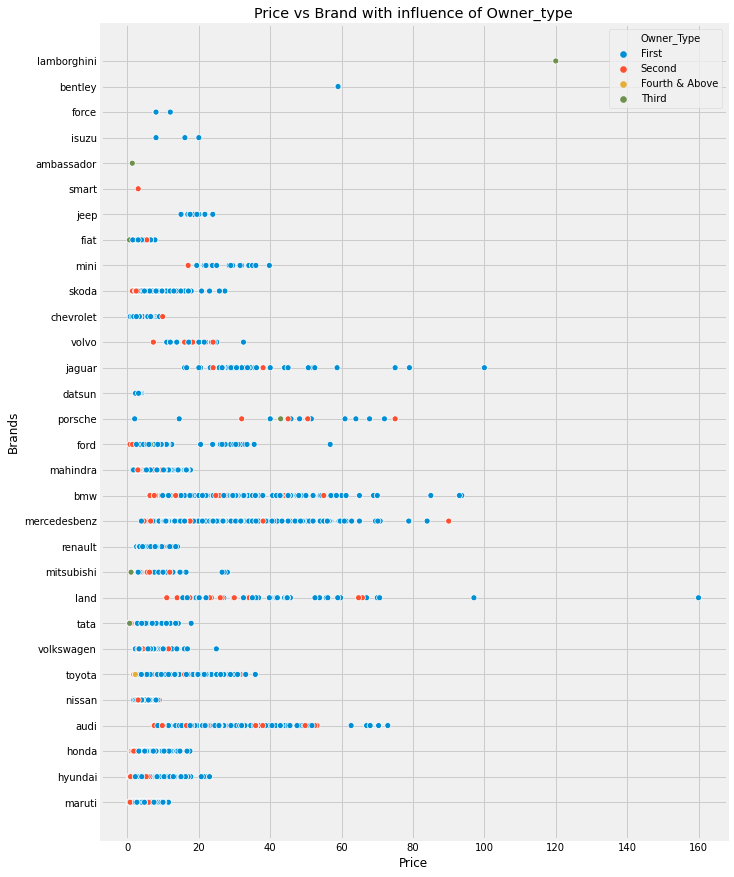

In [ ]:
plt.figure(figsize=(10,15))
sns.scatterplot(y=dstrain['Brands'],x=dstrain['Price'],hue=dstrain["Owner_Type"])
plt.title("Price vs Brand with influence of Owner_type")

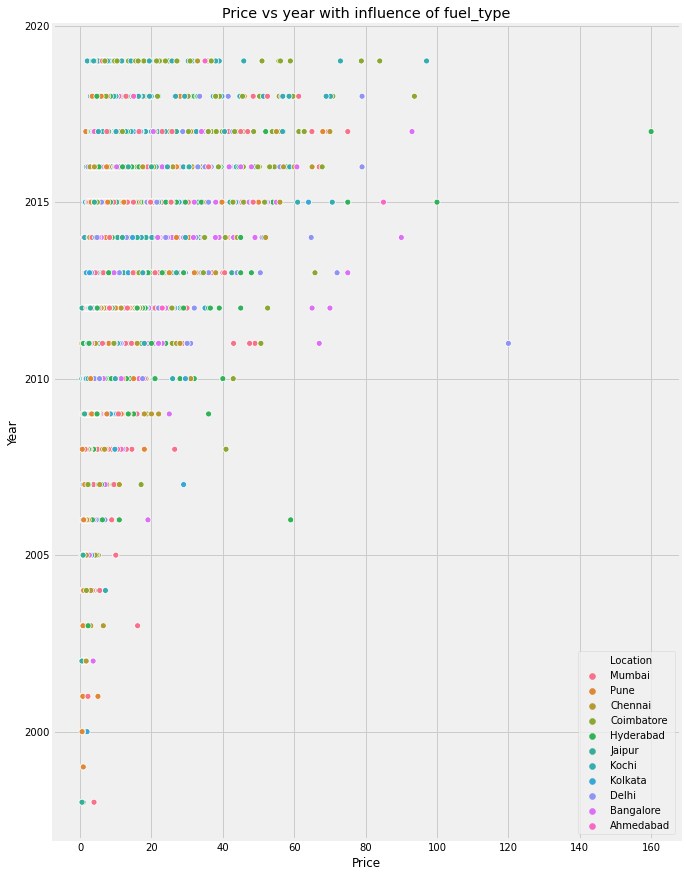

In [ ]:
plt.figure(figsize=(10,15))
plt.title("Price vs year with influence of fuel_type")
sns.scatterplot(y=dstrain["Year"],x=dstrain["Price"],hue=dstrain["Location"])

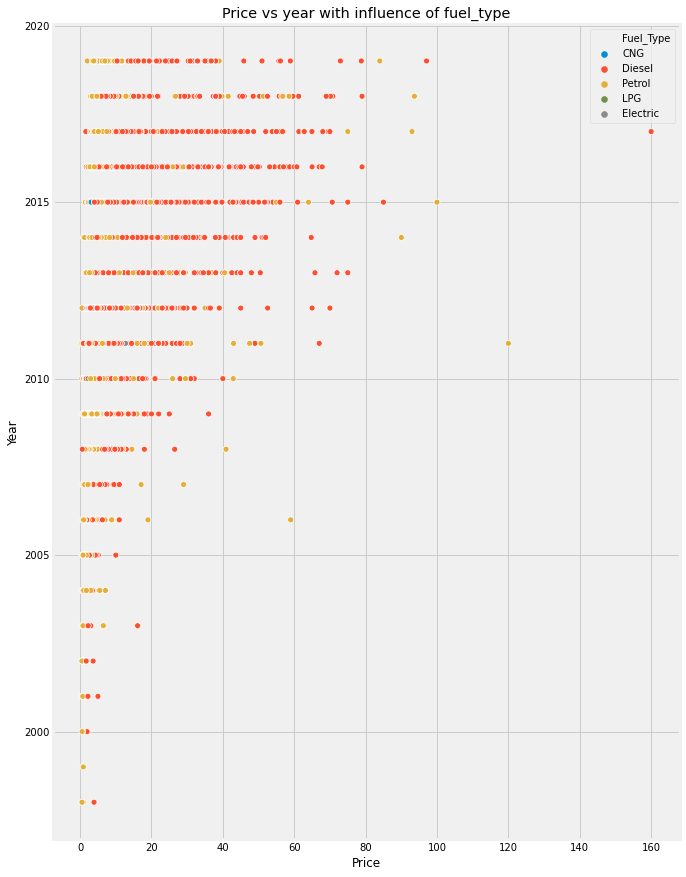

In [ ]:
plt.figure(figsize=(10,15))
plt.title("Price vs year with influence of fuel_type")
sns.scatterplot(y=dstrain["Year"],x=dstrain["Price"],hue=dstrain["Fuel_Type"])

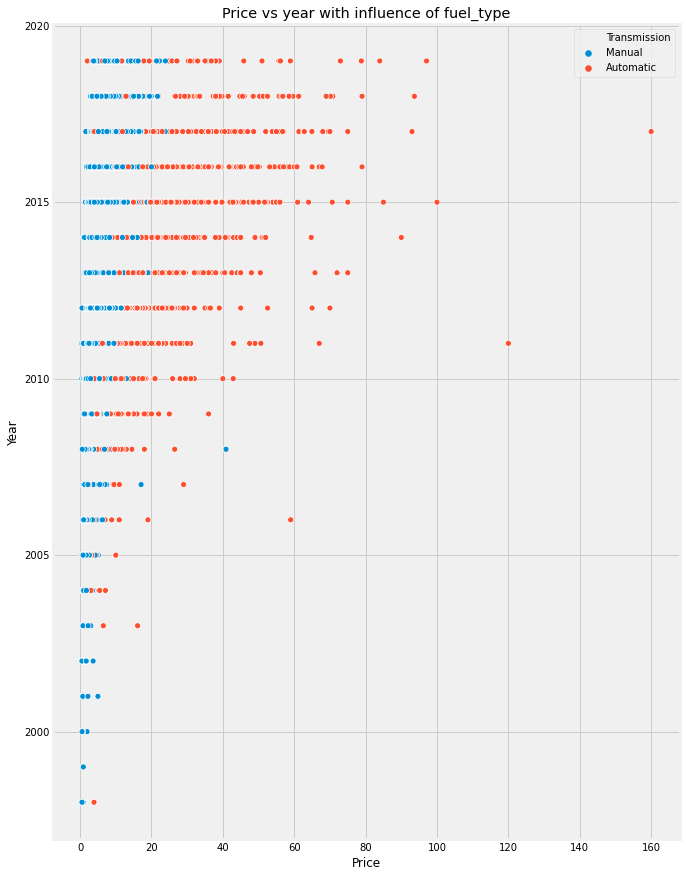

In [ ]:
plt.figure(figsize=(10,15))
plt.title("Price vs year with influence of fuel_type")
sns.scatterplot(y=dstrain["Year"],x=dstrain["Price"],hue=dstrain["Transmission"])

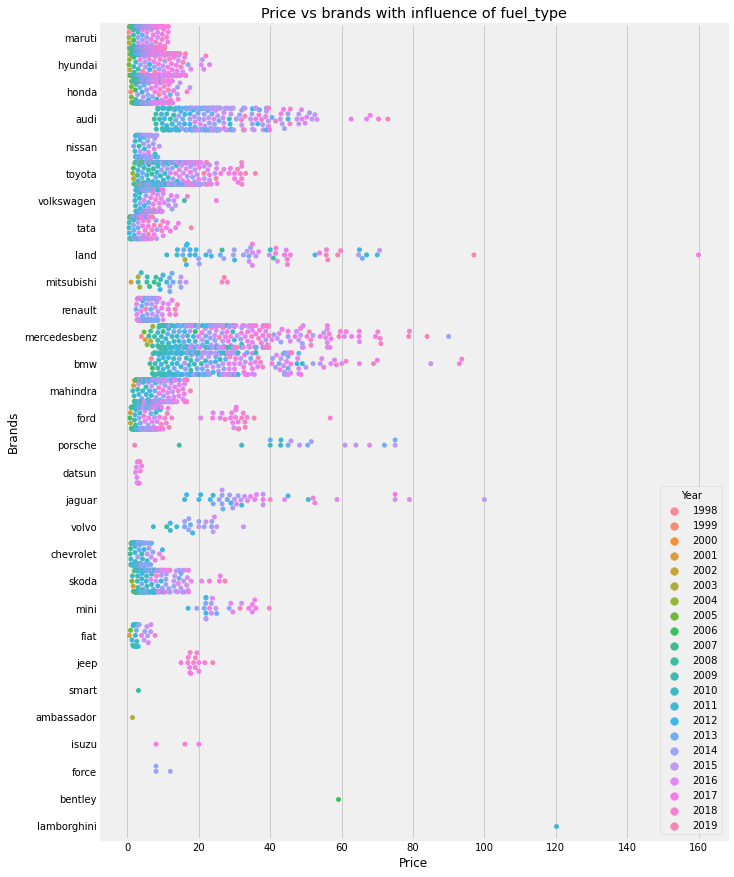

In [ ]:
plt.figure(figsize=(10,15))
plt.title("Price vs brands with influence of fuel_type")
sns.swarmplot(y=dstrain["Brands"],x=dstrain["Price"],hue=dstrain["Year"])

# Null value imputation

**#for train data**

In [ ]:
#no of null values
for i in dstrain.columns:
    if dstrain[i].isnull().sum()>0:
        print(i,dstrain[i].isnull().sum())

Mileage 2
Engine 36
Power 36
Seats 42


In [ ]:
#splitting the column values from alphanum to numeric data
mlg=[]
eng=[]
pwr=[]
for i,row in dstrain.iterrows():
    try:
        mlg.append(row["Mileage"].split()[0])
    except:
        mlg.append(0)
    try:
        eng.append(row["Engine"].split()[0])
    except:
        eng.append(1)
    
    try:
        if row["Power"].split()[0] == "null":
            pwr.append(0)
        else:
            pwr.append(row["Power"].split()[0])
    except:
        pwr.append(0)

dstrain["mlgcleaned"]=mlg
dstrain["mlgcleaned"]=dstrain["mlgcleaned"].astype("float")
dstrain["engcleaned"]=eng
dstrain["engcleaned"]=dstrain["engcleaned"].astype("float")
dstrain["pwrcleaned"]=pwr
dstrain["pwrcleaned"]=dstrain["pwrcleaned"].astype("float")

In [ ]:
#getting the description of train data
dstrain.describe()

,Year,Kilometers_Driven,Seats,Price,mlgcleaned,engcleaned,pwrcleaned
count,6019.000000,6.019000e+03,5977.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468,18.128935,1611.585479,110.562372
std,3.269742,9.126884e+04,0.808840,11.187917,4.593436,612.434133,55.956041
min,1998.000000,1.710000e+02,0.000000,0.440000,0.000000,1.000000,0.000000
25%,2011.000000,3.400000e+04,5.000000,3.500000,15.160000,1197.000000,74.000000
50%,2014.000000,5.300000e+04,5.000000,5.640000,18.150000,1493.000000,91.100000
75%,2016.000000,7.300000e+04,5.000000,9.950000,21.100000,1969.000000,138.030000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000


In [ ]:
#mileage data cleaning
dstrain["mlgcleaned"].loc[(dstrain.mlgcleaned==0)]=dstrain.mlgcleaned.mean()
dstrain["mlgcleaned"]=dstrain["mlgcleaned"].fillna(dstrain.mlgcleaned.mean())

c:\users\bhanu\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
#Engine data cleaning
pm=dstrain[(dstrain.Fuel_Type=="Petrol") & (dstrain.Transmission=="Manual")]["engcleaned"].mean()
dm=dstrain[(dstrain.Fuel_Type=="Diesel") & (dstrain.Transmission=="Manual")]["engcleaned"].mean()
pa=dstrain[(dstrain.Fuel_Type=="Petrol") & (dstrain.Transmission=="Automatic")]["engcleaned"].mean()
da=dstrain[(dstrain.Fuel_Type=="Diesel") & (dstrain.Transmission=="Automatic")]["engcleaned"].mean()
dstrain["engcleaned"].loc[(dstrain.Fuel_Type=="Petrol") & (dstrain.Transmission=="Manual") & (dstrain["Engine"].isnull())]=pm
dstrain["engcleaned"].loc[(dstrain.Fuel_Type=="Petrol") & (dstrain.Transmission=="Automatic") & (dstrain["Engine"].isnull())]=pa
dstrain["engcleaned"].loc[(dstrain.Fuel_Type=="Diesel") & (dstrain.Transmission=="Manual") & (dstrain["Engine"].isnull())]=dm
dstrain["engcleaned"].loc[(dstrain.Fuel_Type=="Diesel") & (dstrain.Transmission=="Automatic") & (dstrain["Engine"].isnull())]=da

In [ ]:
#power data cleaing
pwrmissing=[]
for i,j in dstrain[dstrain.pwrcleaned==0].iterrows():
    pwrmissing.append(dstrain[(dstrain.mlgcleaned.between(j.mlgcleaned-20,j.mlgcleaned+20))
                              & (dstrain.engcleaned.between(j.engcleaned-200,j.engcleaned+200))]["pwrcleaned"].mean())
dstrain["pwrcleaned"].loc[(dstrain.pwrcleaned==0)]=pwrmissing

In [ ]:
#seats data cleaning
stsmissing=[]
for i,j in dstrain[(dstrain["Seats"].isnull())| (dstrain["Seats"]==0)].iterrows():
    stsmissing.append(round(dstrain[dstrain["Name"].str.match(" ".join((j["Name"].split()[0],j["Name"].split()[1])))]["Seats"]))

j=0
for i in dstrain[(dstrain["Seats"].isnull()) | (dstrain.Seats==0)].index.tolist():
    dstrain.loc[i,["Seats"]]=stsmissing[j]
    j+=1
dstrain.Seats[dstrain.Seats==0]=dstrain["Seats"].mean()
dstrain.Seats=dstrain.Seats.fillna(dstrain["Seats"].mean())

c:\users\bhanu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#getting the description of train data after cleaning
dstrain.describe()

,Year,Kilometers_Driven,Seats,Price,mlgcleaned,engcleaned,pwrcleaned
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,5.279618,9.479468,18.339772,1620.273547,112.738355
std,3.269742,9.126884e+04,0.803134,11.187917,4.151183,600.566773,53.598779
min,1998.000000,1.710000e+02,2.000000,0.440000,6.400000,72.000000,34.200000
25%,2011.000000,3.400000e+04,5.000000,3.500000,15.400000,1198.000000,75.000000
50%,2014.000000,5.300000e+04,5.000000,5.640000,18.150000,1493.000000,93.700000
75%,2016.000000,7.300000e+04,5.000000,9.950000,21.100000,1984.000000,138.100000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000


In [ ]:
#cheching for null values after cleaning
#no of null values
for i in ["Seats","mlgcleaned","engcleaned","pwrcleaned"]:
    if dstrain[i].isnull().sum()>0:
        print(i,dstrain[i].isnull().sum())
    else:
        print(i,"no null values")

Seats no null values
mlgcleaned no null values
engcleaned no null values
pwrcleaned no null values


**#for test data**

In [ ]:
#no of null values
for i in dstest.columns:
    if dstest[i].isnull().sum()>0:
        print(i,dstrain[i].isnull().sum())

Engine 36
Power 36
Seats 0


In [ ]:
dstest.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [ ]:
#splitting the column values from alphanum to numeric data
tmlg=[]
teng=[]
tpwr=[]
for i,row in dstest.iterrows():
    try:
        tmlg.append(row["Mileage"].split()[0])
    except:
        tmlg.append(0)
    try:
        teng.append(row["Engine"].split()[0])
    except:
        teng.append(1)
    
    try:
        if row["Power"].split()[0] == "null":
            tpwr.append(0)
        else:
            tpwr.append(row["Power"].split()[0])
    except:
        tpwr.append(0)

dstest["mlgcleaned"]=tmlg
dstest["mlgcleaned"]=dstest["mlgcleaned"].astype("float")
dstest["engcleaned"]=teng
dstest["engcleaned"]=dstest["engcleaned"].astype("float")
dstest["pwrcleaned"]=tpwr
dstest["pwrcleaned"]=dstest["pwrcleaned"].astype("float")

In [ ]:
#mileage data cleaning
dstrain["mlgcleaned"].loc[(dstrain.mlgcleaned==0)]=dstrain.mlgcleaned.mean()

In [ ]:
#Engine data cleaning
tpm=dstest[(dstest.Fuel_Type=="Petrol") & (dstest.Transmission=="Manual")]["engcleaned"].mean()
tdm=dstest[(dstest.Fuel_Type=="Diesel") & (dstest.Transmission=="Manual")]["engcleaned"].mean()
tpa=dstest[(dstest.Fuel_Type=="Petrol") & (dstest.Transmission=="Automatic")]["engcleaned"].mean()
tda=dstest[(dstest.Fuel_Type=="Diesel") & (dstest.Transmission=="Automatic")]["engcleaned"].mean()
dstest["engcleaned"].loc[(dstest.Fuel_Type=="Petrol") & (dstest.Transmission=="Manual") & (dstest["Engine"].isnull())]=tpm
dstest["engcleaned"].loc[(dstest.Fuel_Type=="Petrol") & (dstest.Transmission=="Automatic") & (dstest["Engine"].isnull())]=tpa
dstest["engcleaned"].loc[(dstest.Fuel_Type=="Diesel") & (dstest.Transmission=="Manual") & (dstest["Engine"].isnull())]=tdm
dstest["engcleaned"].loc[(dstest.Fuel_Type=="Diesel") & (dstest.Transmission=="Automatic") & (dstest["Engine"].isnull())]=tda

In [ ]:
#Power data cleaning
pwrtmiss=[]
for i,j in dstest[dstest.pwrcleaned==0].iterrows():
    pwrtmiss.append(dstest[(dstest.mlgcleaned.between(j.mlgcleaned-20,j.mlgcleaned+20))
                              & (dstest.engcleaned.between(j.engcleaned-200,j.engcleaned+200))]["pwrcleaned"].mean())
dstest["pwrcleaned"].loc[(dstest.pwrcleaned==0)]=pwrtmiss

In [ ]:
#Seats data cleaning
ststmiss=[]
for i,j in dstest[(dstest["Seats"].isnull())| (dstest["Seats"]==0)].iterrows():
    ststmiss.append(round(dstest[dstest["Name"].str.match(" ".join((j["Name"].split()[0],j["Name"].split()[1])))]["Seats"]))

j=0
for i in dstest["Seats"].loc[(dstest["Seats"]).isnull()|(dstest.Seats==0)].index.tolist():
    dstest.loc[i,["Seats"]]=ststmiss[j]
    j+=1
    
dstest.Seats[dstest.Seats==0]=dstest["Seats"].mean()
dstest.Seats=dstest.Seats.fillna(dstest["Seats"].mean())

c:\users\bhanu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
dstest.describe()

,Year,Kilometers_Driven,Seats,mlgcleaned,engcleaned,pwrcleaned
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,5.284546,18.173857,1593.204249,109.954575
std,3.179700,35598.702098,0.821931,4.464615,563.072895,51.116290
min,1996.000000,1000.000000,2.000000,0.000000,624.000000,34.200000
25%,2011.000000,34000.000000,5.000000,15.215000,1198.000000,75.038596
50%,2014.000000,54572.500000,5.000000,18.250000,1461.000000,91.101633
75%,2016.000000,75000.000000,5.000000,21.100000,1968.000000,126.320000
max,2019.000000,350000.000000,10.000000,32.260000,5998.000000,616.000000


# Data Processing

#lets train the model and test it

In [ ]:
dstrain.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brands', 'Model', 'mlgcleaned', 'engcleaned', 'pwrcleaned'],
      dtype='object')

Important features are Model, Brand, Year, Kilometers_Drive,milege, engine and power

In [ ]:
dstrain["below 2000"]=dstrain["Year"].apply(lambda x: 1 if x<=2000 else 0)
dstrain["2001-2005"]=dstrain["Year"].apply(lambda x: 1 if x>2000 and x<=2005 else 0)
dstrain["2005-2010"]=dstrain["Year"].apply(lambda x: 1 if x>2005 and x<=2010 else 0)
dstrain["2010-2015"]=dstrain["Year"].apply(lambda x: 1 if x>2010 and x<=2015 else 0)
dstrain["2015-2020"]=dstrain["Year"].apply(lambda x: 1 if x>2015 and x<=2020 else 0)

In [ ]:
high=dstrain[dstrain.Price>45].Brands.unique().tolist()
dstrain["is_mercesdesbenz_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_land_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_bmw_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_audi_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_jaguar_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_porsche_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_ford_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_bentley_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)
dstrain["is_lamborghini_high"]=dstrain["Brands"].apply(lambda x: 1 if x in high else 0)

In [ ]:
d=dstrain[(dstrain.Kilometers_Driven>=600000)].index
dstrain.drop(d,inplace=True)
for i in ["Kilometers_Driven","mlgcleaned","pwrcleaned","engcleaned"]:
    dstrain[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(dstrain[i].values.astype("float").reshape(-1,1))

In [ ]:
dstrain = pd.get_dummies(dstrain,columns = ["Model","Brands"],drop_first = True)

In [ ]:
target=dstrain.Price
dstrain_final=dstrain.drop(["Price"],axis=1)

In [ ]:
dstrain_final.drop(['Name', 'Location', 'Year','Fuel_Type','Transmission',"Owner_Type", 'Mileage', 'Engine','Power', 'Seats'],axis=1,inplace=True)

# Train test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dstrain_final,target,test_size = 0.3,random_state = 42)

In [ ]:
X_train.shape,X_test.shape

((4210, 257), (1805, 257))

In [ ]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

# Linear Regression Model

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

-1.9048556607400816e+24

In [ ]:
print("Accuracy :",(linearRegression.score(X_test,y_test)*100)**2,'%')

Accuracy : 3.6284750882535327e+52 %


It seems Linear regression is a Very poor model for our prediction!..

# Random Forest Regression Model

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8876493572704763

In [ ]:
rms=mean_squared_error(y_test, y_pred)
rms

14.2915373047573

In [ ]:
print("Accuracy :",rf.score(X_test,y_test)*100,'%')

Accuracy : 88.76493572704763 %


#hence randomforest regression can be the good model to predict the price

In [ ]:
dstest.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brands', 'Model', 'mlgcleaned', 'engcleaned', 'pwrcleaned'],
      dtype='object')

In [ ]:
dstest["below 2000"]=dstest["Year"].apply(lambda x: 1 if x<=2000 else 0)
dstest["2001-2005"]=dstest["Year"].apply(lambda x: 1 if x>2000 and x<=2005 else 0)
dstest["2005-2010"]=dstest["Year"].apply(lambda x: 1 if x>2005 and x<=2010 else 0)
dstest["2010-2015"]=dstest["Year"].apply(lambda x: 1 if x>2010 and x<=2015 else 0)
dstest["2015-2020"]=dstest["Year"].apply(lambda x: 1 if x>2015 and x<=2020 else 0)

In [ ]:
d=dstest[(dstest.Kilometers_Driven>=600000)].index
dstest.drop(d,inplace=True)
for i in ["Kilometers_Driven","mlgcleaned","pwrcleaned","engcleaned"]:
    dstest[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(dstest[i].values.astype("float").reshape(-1,1))

In [ ]:
dstest = pd.get_dummies(dstest,columns = ["Model","Brands"],drop_first = True)


In [ ]:
dstest.drop(['Name', 'Location', 'Year','Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],axis=1,inplace=True)

In [ ]:
dstest_final=dstest

In [ ]:
dstest_final.shape

(1234, 195)

In [ ]:
ds=pd.merge(dstrain_final,dstest_final,how="left")

In [ ]:
ds.shape,dstrain_final.shape

((6015, 265), (6015, 257))

In [ ]:
ds.dropna(how='any',axis=1,inplace=True)

In [ ]:
ds.shape,dstest_final.shape,dstrain_final.shape

((6015, 257), (1234, 195), (6015, 257))

In [ ]:
#using randomforest regression model for prediction
ypred=rf.predict(ds)
ypred=ypred.round(2)
ypred

array([6.12, 5.76, 5.56, ..., 6.39, 5.84, 5.64])

In [ ]:
res = pd.DataFrame(ypred)
res.reset_index
res.columns = ["price"]
res.to_excel("price.xlsx")

# KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
knnr = KNeighborsRegressor(n_neighbors = 10)
knnr.fit(X_train, y_train)
y_pred = knnr.predict(X_test)
r2_score(y_test, y_pred)

0.8076322535303967

In [ ]:
rms=mean_squared_error(y_test, y_pred)
rms

24.47009432354571

In [ ]:
print ("The MSE is:",format(np.power(target - knnr.predict(dstrain_final),2).mean()))
print("Accuracy is:",knnr.score(X_test,y_test)*100,'%')

The MSE is: 126.23413779567747
Accuracy is: 80.76322535303967 %


#knn can also be used to predict the prices so lets do it

In [ ]:
knnpred=knnr.predict(ds)
knnpred.round(2)

array([4.47, 4.6 , 4.54, ..., 4.49, 4.6 , 4.64])

# SVM model for regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)
print("Accuracy is:",regressor.score(X_test,y_test)*100,'%')

Accuracy is: 77.54813761454598 %


  **Among the above models random forest regression is more accurate one in prediction**